<a href="https://colab.research.google.com/github/phatnguyenthuan1502/Remaining-Useful-Life-Assessment-of-Bypass-and-Blocking-Diodes-in-Photovoltaic-Arrays/blob/main/WT_CNN_time_series_analysis_(data_0)(split_0)(WT_use_cA_and_cD)(WT_1_level)(2_CNN_model)(CNN_uses_LeakyReLU)(1_fully_connected_layers)(find_LC_from_temp_and_Nf).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
import pandas as pd
book = pd.ExcelFile('Data for ML TT-DB0.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

temp = sheet.loc[:,"Temperature"]
nf = sheet.loc[:,"Nf"]
lc = sheet.loc[:,"LC"]


print(pd.Series(temp).array)
print(pd.Series(nf).array)
print(pd.Series(lc).array)

<PandasArray>
["TT 41'", "TT 44'", "TT 47'", "TT 50'", "TT 53'", "TT 56'", "TT 59'",
 "TT 62'", "TT 65'", "TT 68'",
 ...
 "TT 47'", "TT 50'", "TT 38'", "TT 40'", "TT 43'", "TT 46'", "TT 49'",
 "TT 52'", "TT 54'", "TT 57'"]
Length: 485, dtype: object
<PandasArray>
[41090.5061075265, 39607.9167484446, 39237.7021284893, 38280.1016563549,
 49376.1002417963, 36766.2488161939,  35987.539636953,   37974.03129662,
 34512.2493018107, 48315.0959072694,
 ...
 53365.4528603779, 37203.2022351574, 50240.0562554178, 40441.3650671086,
 41569.4387577175, 53495.5587959451, 46559.4539687279, 45999.9230542643,
 35568.2691226242, 35616.6976337195]
Length: 485, dtype: float64
<PandasArray>
[3.65047827854631e-05, 3.78712167450439e-05, 3.82285383350952e-05,
 3.91848489187851e-05, 9.11372096614223e-05, 4.07982877855985e-05,
 4.16810933765463e-05, 6.58344640965869e-05, 4.34628292952584e-05,
  0.00013453352162387,
 ...
   0.0001218016460388, 4.03191099120625e-05, 9.95221815552966e-06,
 1.23635787063641e-05, 6.01

In [7]:
temp = pd.Series(temp).array
nf = pd.Series(nf).array
lc = pd.Series(lc).array

print(temp)
print(nf)
print(lc)

<PandasArray>
["TT 41'", "TT 44'", "TT 47'", "TT 50'", "TT 53'", "TT 56'", "TT 59'",
 "TT 62'", "TT 65'", "TT 68'",
 ...
 "TT 47'", "TT 50'", "TT 38'", "TT 40'", "TT 43'", "TT 46'", "TT 49'",
 "TT 52'", "TT 54'", "TT 57'"]
Length: 485, dtype: object
<PandasArray>
[41090.5061075265, 39607.9167484446, 39237.7021284893, 38280.1016563549,
 49376.1002417963, 36766.2488161939,  35987.539636953,   37974.03129662,
 34512.2493018107, 48315.0959072694,
 ...
 53365.4528603779, 37203.2022351574, 50240.0562554178, 40441.3650671086,
 41569.4387577175, 53495.5587959451, 46559.4539687279, 45999.9230542643,
 35568.2691226242, 35616.6976337195]
Length: 485, dtype: float64
<PandasArray>
[3.65047827854631e-05, 3.78712167450439e-05, 3.82285383350952e-05,
 3.91848489187851e-05, 9.11372096614223e-05, 4.07982877855985e-05,
 4.16810933765463e-05, 6.58344640965869e-05, 4.34628292952584e-05,
  0.00013453352162387,
 ...
   0.0001218016460388, 4.03191099120625e-05, 9.95221815552966e-06,
 1.23635787063641e-05, 6.01

In [8]:
temp_new = []
for str_temp in temp:
  str_new = str_temp.replace("TT ","")
  str_new = str_new.replace("'","")
  temp_new.append(int(str_new))

In [9]:
temp_new

[41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 40,
 43,
 46,
 49,
 52,
 55,
 58,
 61,
 64,
 67,
 70,
 73,
 76,
 79,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90,
 93,
 96,
 99,
 102,
 105,
 108,
 111,
 114,
 117,
 120,
 38,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 38,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 95,
 98,
 101,
 104,
 107,
 110,
 113,
 116,
 119,
 122,
 125,
 102,
 105,
 108,
 111,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90,
 93,
 96,
 99,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 40,
 43,
 46,
 49,
 52,
 55,
 58,
 61,
 64,
 67,
 70,
 73,
 76,
 79,
 42,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 39,
 42,


In [10]:
nf = nf/1000

print(nf)

<PandasArray>
[41.090506107526494,   39.6079167484446, 39.237702128489296,
   38.2801016563549,   49.3761002417963,   36.7662488161939,
    35.987539636953,     37.97403129662,   34.5122493018107,
   48.3150959072694,
 ...
  53.36545286037791,   37.2032022351574, 50.240056255417805,
   40.4413650671086,   41.5694387577175,   53.4955587959451,
   46.5594539687279,   45.9999230542643,   35.5682691226242,
 35.616697633719504]
Length: 485, dtype: float64


In [11]:
lc = lc*1000000

print(lc)

<PandasArray>
[  36.5047827854631,   37.8712167450439, 38.228538335095195,
   39.1848489187851,   91.1372096614223,   40.7982877855985,
   41.6810933765463,   65.8344640965869,   43.4628292952584,
    134.53352162387,
 ...
     121.8016460388,   40.3191099120625,   9.95221815552966,
   12.3635787063641,   60.1403356579085, 121.50541365113601,
   96.6506180038638,  97.82625059375701,   14.0574734822269,
 42.115078029578406]
Length: 485, dtype: float64


In [12]:
temp_new = np.array(temp_new)
nf = np.array(nf)
lc = np.array(lc)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from numpy import array
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
import tensorflow as tf
import pywt

In [14]:
def get_wave(data, wavelet, num_level, mode):
  return pywt.wavedec(data, wavelet, level = num_level, mode = mode)

In [123]:
pywt.wavelist(family=None, kind='all')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

In [124]:
pywt.Modes.modes

['zero',
 'constant',
 'symmetric',
 'periodic',
 'smooth',
 'periodization',
 'reflect',
 'antisymmetric',
 'antireflect']

In [134]:
wavelet = 'db1'
mode = 'constant'
num_level = 1

In [135]:
a = [1,2,3,4,5,6,7,8,9]
get_wave(a, wavelet, num_level, mode)

[array([ 2.12132034,  4.94974747,  7.77817459, 10.60660172, 12.72792206]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678,  0.        ])]

In [122]:
a = [1,2]
get_wave(a, wavelet, num_level, mode)

[array([2.12132034]), array([-0.70710678])]

In [110]:
a = [3,4]
get_wave(a, wavelet, num_level, mode)

[array([4.94974747, 4.94974747]), array([-0.70710678, -0.70710678])]

In [111]:
a = [5,6]
get_wave(a, wavelet, num_level, mode)

[array([7.77817459, 7.77817459]), array([-0.70710678, -0.70710678])]

In [128]:
a = [7,8]
get_wave(a, wavelet, num_level, mode)

[array([10.60660172]), array([-0.70710678])]

In [136]:
a = [9]
get_wave(a, wavelet, num_level, mode)

[array([12.72792206]), array([0.])]

In [22]:
# multivariate data preparation
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [23]:
# define input sequence
in_seq1 = temp_new
in_seq2 = nf
out_seq = lc
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

(485, 1, 2) (485,)
[[41.         41.09050611]] 36.5047827854631
[[44.         39.60791675]] 37.8712167450439
[[47.         39.23770213]] 38.228538335095195
[[50.         38.28010166]] 39.1848489187851
[[53.         49.37610024]] 91.1372096614223
[[56.         36.76624882]] 40.7982877855985
[[59.         35.98753964]] 41.6810933765463
[[62.        37.9740313]] 65.8344640965869
[[65.        34.5122493]] 43.4628292952584
[[68.         48.31509591]] 134.53352162387
[[71.         43.99309465]] 125.019620548907
[[74.         46.27433095]] 140.466644605959
[[77.         39.42034014]] 126.838073506385
[[80.         43.68792463]] 148.782530979869
[[83.         46.87624493]] 159.995750744629
[[86.         49.29432037]] 172.43365840586898
[[89.         42.30730843]] 153.637757677686
[[92.        47.4898895]] 178.985465950395
[[40.         69.05736232]] 144.807152549981
[[43.         59.21081419]] 126.66605082537001
[[46.         54.28823182]] 119.731289494877
[[49.         43.15276192]] 81.107207

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=False)

In [25]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False)

In [26]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

348
348
88
88
49
49


In [27]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [28]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [29]:
for i in range(len(X_train)):
	print(X_train[i], y_train[i])

[[41.       41.090508]] 36.504784
[[44.       39.607918]] 37.871216
[[47.     39.2377]] 38.22854
[[50.     38.2801]] 39.18485
[[53.     49.3761]] 91.13721
[[56.      36.76625]] 40.798286
[[59.      35.98754]] 41.681095
[[62.      37.97403]] 65.834465
[[65.      34.51225]] 43.46283
[[68.       48.315098]] 134.53352
[[71.       43.993095]] 125.01962
[[74.      46.27433]] 140.46664
[[77.      39.42034]] 126.83807
[[80.       43.687923]] 148.78253
[[83.       46.876244]] 159.99576
[[86.      49.29432]] 172.43365
[[89.      42.30731]] 153.63776
[[92.      47.48989]] 178.98546
[[40.       69.057365]] 144.80716
[[43.       59.210815]] 126.66605
[[46.      54.28823]] 119.73129
[[49.       43.152763]] 81.10721
[[52.      45.24866]] 99.450455
[[55.       41.307056]] 84.731285
[[58.       40.438698]] 86.55076
[[61.       48.656235]] 133.59029
[[64.      38.76669]] 90.28369
[[67.      43.69458]] 125.87374
[[70.       42.783318]] 128.55478
[[73.       36.552757]] 95.752014
[[76.       33.489403]] 7

In [30]:
for i in range(len(X_val)):
	print(X_val[i], y_val[i])

[[71.       52.938915]] 170.00726
[[74.      45.37029]] 154.286
[[77.      47.62028]] 167.99565
[[80.       52.914326]] 188.98474
[[83.       46.053455]] 173.71118
[[86.       40.973133]] 134.2343
[[36.      44.76422]] 33.508904
[[39.       60.483284]] 132.26794
[[42.      82.58849]] 169.51514
[[45.      97.62819]] 184.37299
[[48.      87.19993]] 172.0185
[[ 51.      110.56135]] 194.46217
[[ 54.      116.46499]] 201.77737
[[ 57.      131.06876]] 209.81354
[[ 60.      137.02846]] 218.93263
[[ 63.      125.83087]] 222.5209
[[66.      92.66365]] 210.4385
[[69.      80.20182]] 205.731
[[72.     82.3818]] 212.42557
[[75.      77.80698]] 212.06325
[[78.       82.848564]] 223.29898
[[81.       77.809425]] 224.9085
[[84.      79.92167]] 231.47664
[[87.      75.29369]] 232.42319
[[90.       55.464153]] 207.34113
[[93.       49.227394]] 203.13892
[[96.      48.65791]] 195.24062
[[99.       44.765915]] 189.8766
[[102.       52.08219]] 220.80484
[[105.        33.778305]] 148.024
[[38.       76.887

In [34]:
train_temp_wave = np.array(get_wave(X_train.T[0][0], wavelet, num_level, mode))
train_nf_wave = np.array(get_wave(X_train.T[1][0], wavelet, num_level, mode))
train_lc_wave = np.array(get_wave(y_train, wavelet, num_level, mode))
val_temp_wave = np.array(get_wave(X_val.T[0][0], wavelet, num_level, mode))
val_nf_wave = np.array(get_wave(X_val.T[1][0], wavelet, num_level, mode))
val_lc_wave = np.array(get_wave(y_val, wavelet, num_level, mode))
test_temp_wave = np.array(get_wave(X_test.T[0][0], wavelet, num_level, mode))
test_nf_wave = np.array(get_wave(X_test.T[1][0], wavelet, num_level, mode))
test_lc_wave = np.array(get_wave(y_test, wavelet, num_level, mode))

In [36]:
train_temp_wave_new = np.concatenate((train_temp_wave[0], train_temp_wave[1]))
train_nf_wave_new = np.concatenate((train_nf_wave[0], train_nf_wave[1]))
train_lc_wave_new = np.concatenate((train_lc_wave[0], train_lc_wave[1]))
val_temp_wave_new = np.concatenate((val_temp_wave[0], val_temp_wave[1]))
val_nf_wave_new = np.concatenate((val_nf_wave[0], val_nf_wave[1]))
val_lc_wave_new = np.concatenate((val_lc_wave[0], val_lc_wave[1]))
test_temp_wave_new = np.concatenate((test_temp_wave[0], test_temp_wave[1]))
test_nf_wave_new = np.concatenate((test_nf_wave[0], test_nf_wave[1]))
test_lc_wave_new = np.concatenate((test_lc_wave[0], test_lc_wave[1]))

In [37]:
hstack((train_temp_wave_new, train_nf_wave_new, train_lc_wave_new))

array([ 60.104073 ,  68.589355 ,  77.07464  , ...,  19.115805 ,
        -7.6256256, -15.138428 ], dtype=float32)

In [38]:
#TRAIN_SET
# define input sequence
in_seq1 = train_temp_wave_new
in_seq2 = train_nf_wave_new
out_seq = train_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_train = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_train_wave, y_train_wave = split_sequences(dataset_train, n_steps)
print(X_train_wave.shape, y_train_wave.shape)
# summarize the data
for i in range(len(X_train_wave)):
	print(X_train_wave[i], y_train_wave[i])

(348, 1, 2) (348,)
[[60.104073 57.0624  ]] 52.591774
[[68.589355 54.813362]] 54.739532
[[77.07464 60.91184]] 93.29248
[[85.55992 52.29873]] 76.02498
[[94.0452  58.56778]] 125.86243
[[102.53049  63.82871]] 187.72714
[[111.01576  58.76642]] 194.89319
[[119.501045  68.00285 ]] 235.06308
[[127.98633  63.49621]] 235.20013
[[58.689865 90.699295]] 191.96054
[[67.17514  68.901184]] 142.01427
[[75.66042  61.204132]] 130.23616
[[84.145706 62.999626]] 155.66322
[[92.63098 58.30892]] 152.84637
[[101.11627   56.099075]] 158.60886
[[109.60155   50.857132]] 135.57784
[[ 57.27565 124.72684]] 161.88702
[[ 65.760925 150.50128 ]] 252.39792
[[ 74.246216 129.05804 ]] 263.4862
[[ 82.73149 146.92625]] 279.0689
[[ 91.216774 110.9317  ]] 274.60492
[[ 99.70206 111.50165]] 291.54233
[[108.18733  99.93619]] 294.82074
[[116.67262 110.50326]] 320.76166
[[125.1579  101.86322]] 333.80673
[[133.64319 103.1491 ]] 339.32977
[[142.12846  79.48796]] 320.23682
[[150.61374   54.594788]] 246.58446
[[159.09903   56.170856]] 2

In [39]:
#VAL_SET
# define input sequence
in_seq1 = val_temp_wave_new
in_seq2 = val_nf_wave_new
out_seq = val_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_val = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_val_wave, y_val_wave = split_sequences(dataset_val, n_steps)
print(X_val_wave.shape, y_val_wave.shape)
# summarize the data
for i in range(len(X_val_wave)):
	print(X_val_wave[i], y_val_wave[i])

(88, 1, 2) (88,)
[[102.53049  69.51511]] 229.30997
[[111.01576  71.0887 ]] 252.42325
[[119.501045  61.537086]] 217.75034
[[53.033005 74.42122 ]] 117.22193
[[ 61.518288 127.432434]] 250.2367
[[ 70.00357 139.83835]] 259.14096
[[ 78.488846 175.03278 ]] 291.0387
[[ 86.97414 185.86961]] 312.1548
[[ 95.45941  122.234344]] 294.27628
[[103.944695 113.27057 ]] 300.1589
[[112.42998  113.602356]] 316.93054
[[120.91525 109.75383]] 328.0267
[[129.40054  74.02811]] 290.25323
[[137.88582  66.06062]] 272.31897
[[146.3711   60.71254]] 260.8014
[[ 55.861435 123.87776 ]] 181.47108
[[ 64.34671 207.18164]] 265.58972
[[ 72.832   192.53592]] 276.9063
[[ 81.317276 208.24141 ]] 304.94083
[[ 89.80256 249.034  ]] 316.99982
[[ 98.28784 245.74445]] 329.484
[[106.77312 227.41489]] 340.78534
[[115.25841 206.04329]] 359.17575
[[123.74368 264.30157]] 369.41553
[[132.22897 204.84888]] 380.66663
[[140.71425 191.95435]] 383.20743
[[149.19952 117.537  ]] 369.24768
[[157.68481 126.40163]] 381.61142
[[166.17009  72.51955]] 

In [40]:
#TEST_SET
# define input sequence
in_seq1 = test_temp_wave_new
in_seq2 = test_nf_wave_new
out_seq = test_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_test = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_test_wave, y_test_wave = split_sequences(dataset_test, n_steps)
print(X_test_wave.shape, y_test_wave.shape)
# summarize the data
for i in range(len(X_test_wave)):
	print(X_test_wave[i], y_test_wave[i])

(50, 1, 2) (50,)
[[ 67.17514 150.52533]] 259.34625
[[ 75.66042 226.5945 ]] 291.25043
[[ 84.145706 194.63336 ]] 303.17316
[[ 92.63098 207.32799]] 303.8913
[[101.11627 188.83496]] 322.94873
[[109.60155 183.82825]] 342.27032
[[118.08683   94.036224]] 268.96906
[[57.27565 85.24036]] 105.95526
[[ 65.760925 113.741806]] 227.63155
[[ 74.246216 136.25815 ]] 275.40613
[[ 82.73149 139.15088]] 280.28186
[[ 91.216774 155.98312 ]] 294.9622
[[ 99.70206 172.91162]] 312.2725
[[108.18733 167.94214]] 327.1114
[[116.67262 129.69238]] 323.62872
[[125.1579  115.24138]] 325.09076
[[133.64319  82.57474]] 282.6567
[[142.12846   51.062077]] 166.33841
[[55.861435 63.094444]] 102.90584
[[64.34671 69.1772 ]] 141.78458
[[62.225395 61.83172 ]] 35.547195
[[58.689865 57.990395]] 51.26801
[[67.17514 70.74958]] 154.25961
[[74.953316 57.67742 ]] 79.11373
[[ 72.832   108.82088]] 158.31291
[[-2.1213188 16.746803 ]] -2.2801514
[[-2.1213226 16.97232  ]] 0.25068665
[[-2.1213226  2.210472 ]] -3.4431763
[[-2.1213188  1.8792267

In [41]:
def get_cA(wave, num_level):
  return(wave[:len(wave)//(2*num_level)])

def get_cD(wave, level, num_level):
  i = 0
  temp_wave = wave
  while(i<level):
    cD = temp_wave[len(temp_wave)//2:]
    temp_wave = temp_wave[:len(temp_wave)//2]
    i = i + 1
  return cD

In [44]:
get_cA(X_train_wave, num_level)

array([[[ 60.104073,  57.0624  ]],

       [[ 68.589355,  54.813362]],

       [[ 77.07464 ,  60.91184 ]],

       [[ 85.55992 ,  52.29873 ]],

       [[ 94.0452  ,  58.56778 ]],

       [[102.53049 ,  63.82871 ]],

       [[111.01576 ,  58.76642 ]],

       [[119.501045,  68.00285 ]],

       [[127.98633 ,  63.49621 ]],

       [[ 58.689865,  90.699295]],

       [[ 67.17514 ,  68.901184]],

       [[ 75.66042 ,  61.204132]],

       [[ 84.145706,  62.999626]],

       [[ 92.63098 ,  58.30892 ]],

       [[101.11627 ,  56.099075]],

       [[109.60155 ,  50.857132]],

       [[ 57.27565 , 124.72684 ]],

       [[ 65.760925, 150.50128 ]],

       [[ 74.246216, 129.05804 ]],

       [[ 82.73149 , 146.92625 ]],

       [[ 91.216774, 110.9317  ]],

       [[ 99.70206 , 111.50165 ]],

       [[108.18733 ,  99.93619 ]],

       [[116.67262 , 110.50326 ]],

       [[125.1579  , 101.86322 ]],

       [[133.64319 , 103.1491  ]],

       [[142.12846 ,  79.48796 ]],

       [[150.61374 ,  54.594

In [45]:
get_cD(X_train_wave, 1, num_level)

array([[[ -2.1213207 ,   1.0483494 ]],

       [[ -2.1213226 ,   0.67712593]],

       [[ -2.1213226 ,   8.916508  ]],

       [[ -2.1213188 ,  -1.4046593 ]],

       [[ -2.1213188 ,  -9.760088  ]],

       [[ -2.1213188 ,  -1.6130791 ]],

       [[ -2.1213226 ,  -3.0176373 ]],

       [[ -2.1213226 ,  -1.7098389 ]],

       [[ -2.1213226 ,  -3.6646404 ]],

       [[ -2.1213207 ,   6.9625587 ]],

       [[ -2.1213188 ,   7.873966  ]],

       [[ -2.1213226 ,   2.7871342 ]],

       [[ -2.1213226 ,  -5.8106747 ]],

       [[ -2.1213188 ,  -3.4845467 ]],

       [[ -2.1213188 ,   4.40567   ]],

       [[ -2.1213188 ,  -3.4959621 ]],

       [[ -2.1213207 ,  -5.0008545 ]],

       [[ -2.1213188 ,  11.14856   ]],

       [[ -2.1213188 ,   1.5677109 ]],

       [[ -2.1213226 ,   1.1601105 ]],

       [[ -2.1213226 ,  -6.9033203 ]],

       [[ -2.1213188 ,   8.895443  ]],

       [[ -2.1213188 ,  10.708683  ]],

       [[ -2.1213188 ,  -8.755623  ]],

       [[ -2.1213226 ,   0.89577484]],



In [46]:
from keras import backend as K
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred) / y_true)))

In [47]:
X_train_wave.shape

(348, 1, 2)

In [49]:
# the dataset knows the number of features, e.g. 2
n_features = X_train_wave.shape[2]
# steps
n_steps = 1
# define model
model_cA = Sequential()
model_cA.add(Conv1D(filters=64, kernel_size=1, activation=tf.keras.layers.LeakyReLU(), input_shape=(n_steps, n_features)))
model_cA.add(MaxPooling1D(pool_size=1))
#model_cA.add(LSTM(4,return_sequences=True))
#model_cA.add(GRU(4, input_shape=(1, n_features)))
model_cA.add(Flatten())
model_cA.add(Dense(50, activation='relu'))
model_cA.add(Dense(2))
model_cA.add(Dense(1))
model_cA.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(name='rmse'), rmspe, 'mape'])

In [50]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log.csv', append=True, separator=';')

In [52]:
# fit model
history_cA = model_cA.fit(get_cA(X_train_wave, num_level), get_cA(y_train_wave, num_level), epochs=2000, verbose=2, callbacks=[csv_logger], validation_data=(get_cA(X_val_wave, num_level), get_cA(y_val_wave, num_level)))

Epoch 1/2000
6/6 - 2s - loss: 44943.9688 - mse: 44943.9688 - mae: 192.8066 - rmse: 211.9999 - rmspe: 0.9840 - mape: 98.8631 - val_loss: 72534.3359 - val_mse: 72534.3359 - val_mae: 260.6678 - val_rmse: 269.3220 - val_rmspe: 0.9552 - val_mape: 95.6951 - 2s/epoch - 282ms/step
Epoch 2/2000
6/6 - 0s - loss: 37617.7969 - mse: 37617.7969 - mae: 173.9645 - rmse: 193.9531 - rmspe: 0.8510 - mape: 84.9772 - val_loss: 60464.6250 - val_mse: 60464.6250 - val_mae: 237.7108 - val_rmse: 245.8956 - val_rmspe: 0.8706 - val_mape: 87.0875 - 52ms/epoch - 9ms/step
Epoch 3/2000
6/6 - 0s - loss: 30728.9746 - mse: 30728.9746 - mae: 155.4749 - rmse: 175.2968 - rmspe: 0.7598 - mape: 75.0896 - val_loss: 49016.8867 - val_mse: 49016.8867 - val_mae: 213.6707 - val_rmse: 221.3976 - val_rmspe: 0.7814 - val_mape: 78.0615 - 58ms/epoch - 10ms/step
Epoch 4/2000
6/6 - 0s - loss: 24351.9941 - mse: 24351.9941 - mae: 136.6635 - rmse: 156.0513 - rmspe: 0.7108 - mape: 66.6962 - val_loss: 37601.1484 - val_mse: 37601.1484 - val_ma

In [53]:
# the dataset knows the number of features, e.g. 2
n_features = X_train_wave.shape[2]
# steps
n_steps = 1
# define model
model_cD = Sequential()
model_cD.add(Conv1D(filters=64, kernel_size=1, activation=tf.keras.layers.LeakyReLU(), input_shape=(n_steps, n_features)))
model_cD.add(MaxPooling1D(pool_size=1))
#model_cD.add(LSTM(4,return_sequences=True))
#model_cD.add(GRU(4, input_shape=(1, n_features)))
model_cD.add(Flatten())
model_cD.add(Dense(50, activation='relu'))
model_cD.add(Dense(2))
model_cD.add(Dense(1))
model_cD.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(name='rmse'), rmspe, 'mape'])

In [54]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log.csv', append=True, separator=';')

In [55]:
# fit model
history_cD = model_cD.fit(get_cD(X_train_wave, 1, num_level), get_cD(y_train_wave, 1, num_level), epochs=2000, verbose=2, callbacks=[csv_logger], validation_data=(get_cD(X_val_wave, 1, num_level), get_cD(y_val_wave, 1, num_level)))

Epoch 1/2000
6/6 - 1s - loss: 764.5116 - mse: 764.5116 - mae: 18.4968 - rmse: 27.6498 - rmspe: 0.9831 - mape: 96.9706 - val_loss: 430.9260 - val_mse: 430.9260 - val_mae: 12.5517 - val_rmse: 20.7588 - val_rmspe: 2.1304 - val_mape: 107.7803 - 1s/epoch - 222ms/step
Epoch 2/2000
6/6 - 0s - loss: 694.0948 - mse: 694.0948 - mae: 17.4973 - rmse: 26.3457 - rmspe: 1.0289 - mape: 94.0646 - val_loss: 389.3030 - val_mse: 389.3030 - val_mae: 12.0616 - val_rmse: 19.7308 - val_rmspe: 3.9848 - val_mape: 146.3089 - 51ms/epoch - 9ms/step
Epoch 3/2000
6/6 - 0s - loss: 639.6295 - mse: 639.6295 - mae: 16.6330 - rmse: 25.2909 - rmspe: 1.1775 - mape: 93.9470 - val_loss: 355.2757 - val_mse: 355.2757 - val_mae: 11.8675 - val_rmse: 18.8488 - val_rmspe: 5.7161 - val_mape: 192.4155 - 65ms/epoch - 11ms/step
Epoch 4/2000
6/6 - 0s - loss: 599.7845 - mse: 599.7845 - mae: 15.8366 - rmse: 24.4905 - rmspe: 1.2336 - mape: 96.5639 - val_loss: 335.1290 - val_mse: 335.1290 - val_mae: 11.9282 - val_rmse: 18.3065 - val_rmspe:

In [56]:
import matplotlib.pyplot as plt
import math

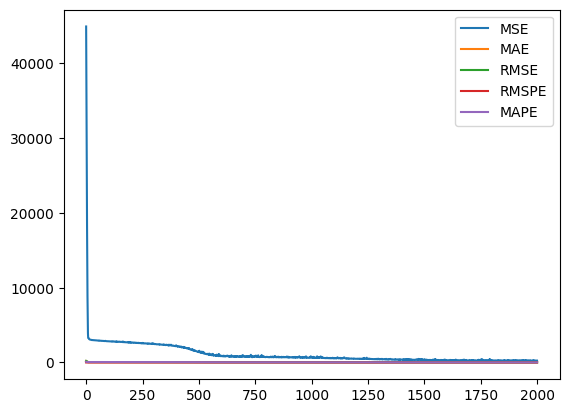

In [57]:
plt.plot(history_cA.history['mse'])
plt.plot(history_cA.history['mae'])
plt.plot(history_cA.history['rmse'])
plt.plot(history_cA.history['rmspe'])
plt.plot(history_cA.history['mape'])
plt.legend(['MSE', 'MAE', 'RMSE', "RMSPE", "MAPE"])
plt.show()

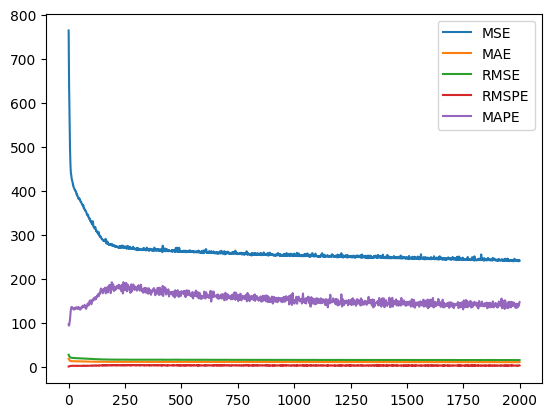

In [58]:
plt.plot(history_cD.history['mse'])
plt.plot(history_cD.history['mae'])
plt.plot(history_cD.history['rmse'])
plt.plot(history_cD.history['rmspe'])
plt.plot(history_cD.history['mape'])
plt.legend(['MSE', 'MAE', 'RMSE', "RMSPE", "MAPE"])
plt.show()

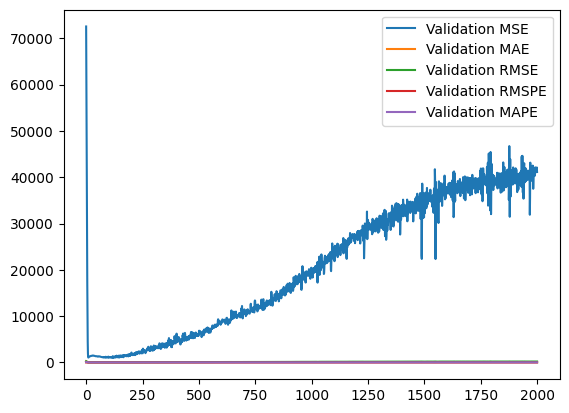

In [59]:
plt.plot(history_cA.history['val_mse'])
plt.plot(history_cA.history['val_mae'])
plt.plot(history_cA.history['val_rmse'])
plt.plot(history_cA.history['val_rmspe'])
plt.plot(history_cA.history['val_mape'])
plt.legend(['Validation MSE', 'Validation MAE', 'Validation RMSE', 'Validation RMSPE', 'Validation MAPE'])
plt.show()

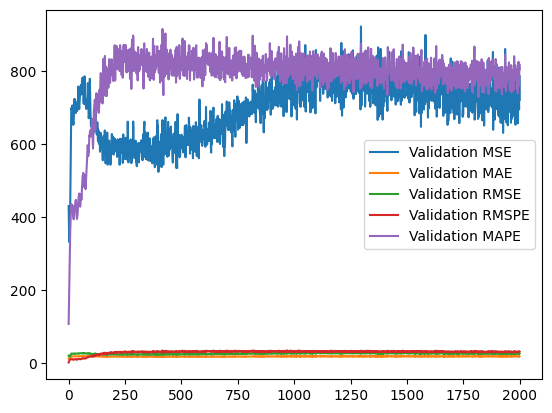

In [60]:
plt.plot(history_cD.history['val_mse'])
plt.plot(history_cD.history['val_mae'])
plt.plot(history_cD.history['val_rmse'])
plt.plot(history_cD.history['val_rmspe'])
plt.plot(history_cD.history['val_mape'])
plt.legend(['Validation MSE', 'Validation MAE', 'Validation RMSE', 'Validation RMSPE', 'Validation MAPE'])
plt.show()

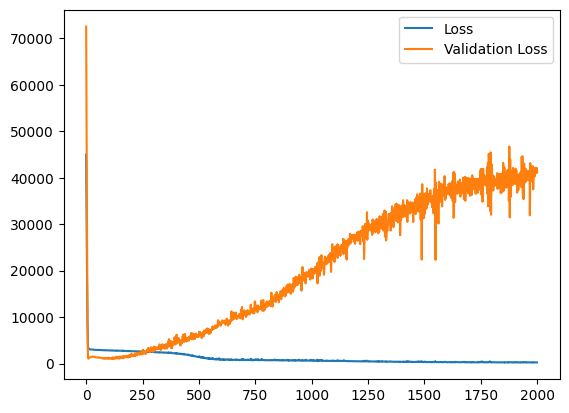

In [61]:
plt.plot(history_cA.history['loss'])
plt.plot(history_cA.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

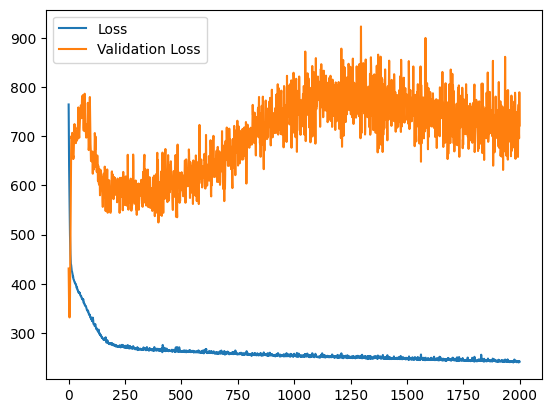

In [62]:
plt.plot(history_cD.history['loss'])
plt.plot(history_cD.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

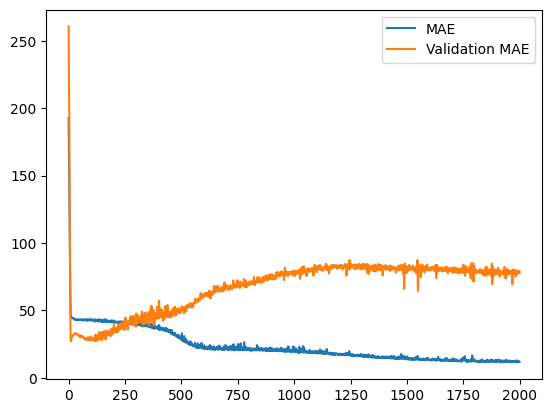

In [63]:
plt.plot(history_cA.history['mae'])
plt.plot(history_cA.history['val_mae'])
plt.legend(['MAE', 'Validation MAE'])
plt.show()

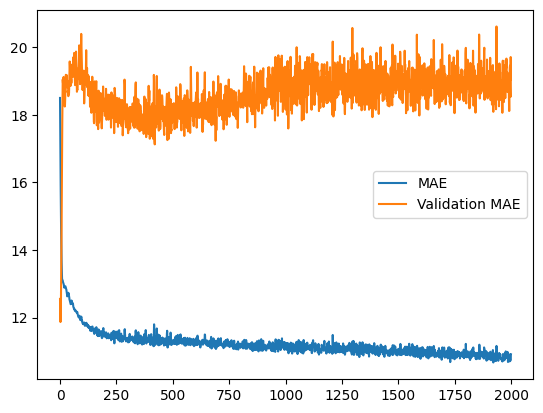

In [64]:
plt.plot(history_cD.history['mae'])
plt.plot(history_cD.history['val_mae'])
plt.legend(['MAE', 'Validation MAE'])
plt.show()

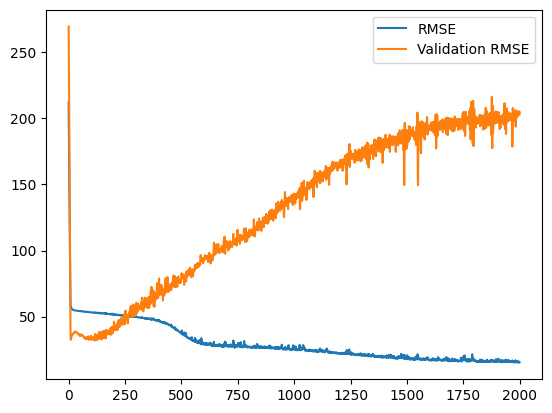

In [65]:
plt.plot(history_cA.history['rmse'])
plt.plot(history_cA.history['val_rmse'])
plt.legend(['RMSE', 'Validation RMSE'])
plt.show()

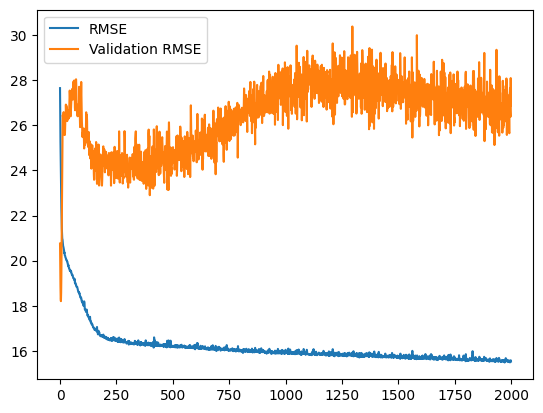

In [66]:
plt.plot(history_cD.history['rmse'])
plt.plot(history_cD.history['val_rmse'])
plt.legend(['RMSE', 'Validation RMSE'])
plt.show()

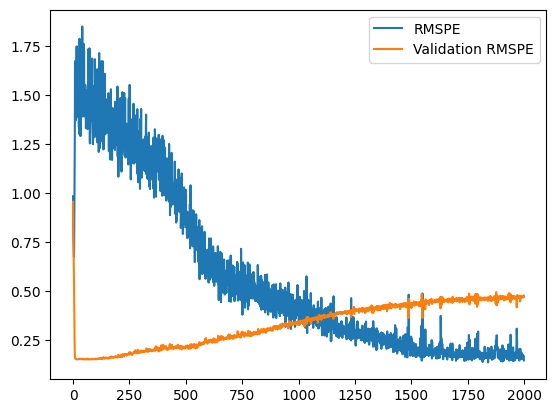

In [67]:
plt.plot(history_cA.history['rmspe'])
plt.plot(history_cA.history['val_rmspe'])
plt.legend(['RMSPE', 'Validation RMSPE'])
plt.show()

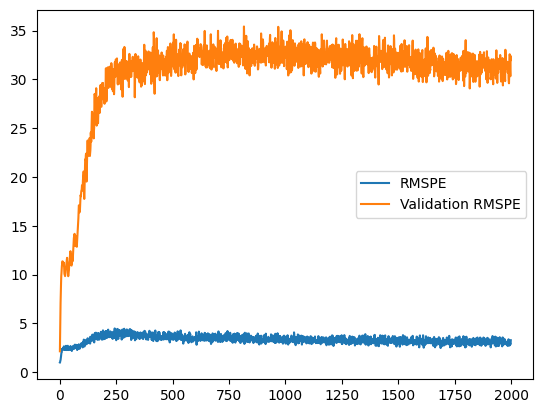

In [68]:
plt.plot(history_cD.history['rmspe'])
plt.plot(history_cD.history['val_rmspe'])
plt.legend(['RMSPE', 'Validation RMSPE'])
plt.show()

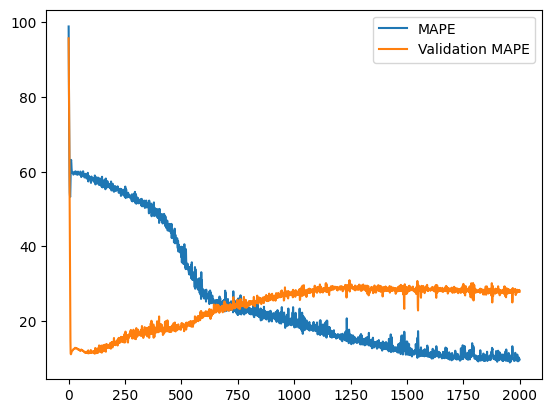

In [69]:
plt.plot(history_cA.history['mape'])
plt.plot(history_cA.history['val_mape'])
plt.legend(['MAPE', 'Validation MAPE'])
plt.show()

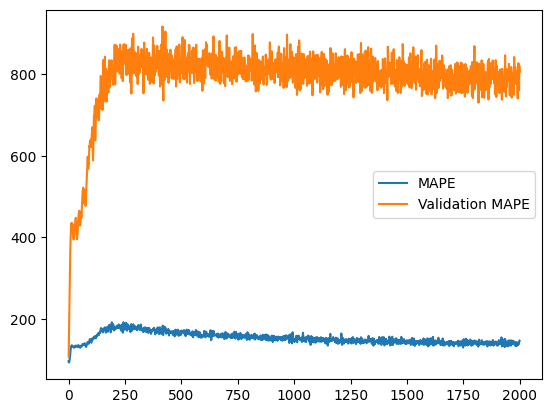

In [70]:
plt.plot(history_cD.history['mape'])
plt.plot(history_cD.history['val_mape'])
plt.legend(['MAPE', 'Validation MAPE'])
plt.show()

In [71]:
# predict all
def predict_all(model, X_test):
  preds = list()
  for x in X_test:
    x = x.reshape((1, n_steps, n_features))
    preds.extend(model.predict(x, verbose=0)[0])
  return preds

In [72]:
preds_wave_cA = predict_all(model_cA, get_cA(X_test_wave, num_level))
print(preds_wave_cA)

[238.8263, -565.9856, 300.29785, 334.56384, 360.027, 383.67908, 304.9201, 159.68573, 227.10765, 260.24268, 287.46298, 320.09235, 352.34555, 367.3932, 342.81177, 345.8778, 309.14447, 206.66173, 77.23707, 134.08607, 95.81511, 64.99263, 151.26509, 99.01895, 235.93434]


In [73]:
for i in range(len(get_cA(y_test_wave, num_level))):
	print(y_test_wave[i],"; ", preds_wave_cA[i])

259.34625 ;  238.8263
291.25043 ;  -565.9856
303.17316 ;  300.29785
303.8913 ;  334.56384
322.94873 ;  360.027
342.27032 ;  383.67908
268.96906 ;  304.9201
105.95526 ;  159.68573
227.63155 ;  227.10765
275.40613 ;  260.24268
280.28186 ;  287.46298
294.9622 ;  320.09235
312.2725 ;  352.34555
327.1114 ;  367.3932
323.62872 ;  342.81177
325.09076 ;  345.8778
282.6567 ;  309.14447
166.33841 ;  206.66173
102.90584 ;  77.23707
141.78458 ;  134.08607
35.547195 ;  95.81511
51.26801 ;  64.99263
154.25961 ;  151.26509
79.11373 ;  99.01895
158.31291 ;  235.93434


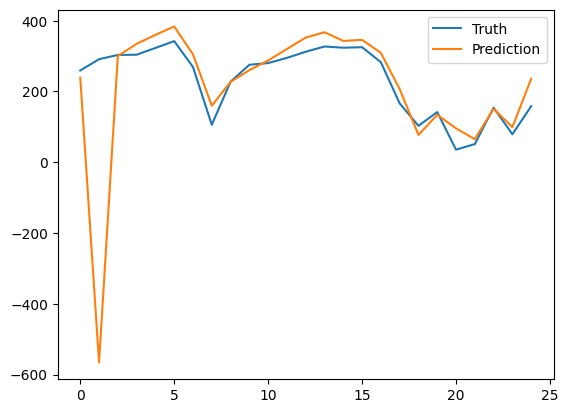

In [78]:
plt.plot(get_cA(y_test_wave, num_level))
plt.plot(preds_wave_cA)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [79]:
preds_wave_cD = predict_all(model_cD, get_cD(X_test_wave, 1, num_level))
print(preds_wave_cD)

[38.202816, 38.3227, -0.25822926, -0.60891026, -20.394611, -37.05616, 45.558815, -1.08392, -21.862516, 16.271193, -3.0916126, 5.166281, -5.999818, -25.884092, 19.016973, 26.076538, 38.282936, -1.05795, -5.5038238, -24.944407, -14.789529, -2.71372, 6.774527, 17.317057, -128.67795]


In [81]:
for i in range(len(get_cD(y_test_wave, 1, num_level))):
	print(get_cD(y_test_wave, 1, num_level)[i],"; ", preds_wave_cD[i])

-2.2801514 ;  38.202816
0.25068665 ;  38.3227
-3.4431763 ;  -0.25822926
-2.7544708 ;  -0.60891026
-4.457184 ;  -20.394611
-5.575119 ;  -37.05616
69.72061 ;  45.558815
-36.279507 ;  -1.08392
-27.148926 ;  -21.862516
-3.6345367 ;  16.271193
1.7200012 ;  -3.0916126
-2.0410461 ;  5.166281
-3.459259 ;  -5.999818
-7.815201 ;  -25.884092
3.5432587 ;  19.016973
3.8369904 ;  26.076538
39.040924 ;  38.282936
6.648781 ;  -1.05795
-5.9461937 ;  -5.5038238
-30.468964 ;  -24.944407
21.472635 ;  -14.789529
-33.783268 ;  -2.71372
17.574997 ;  6.774527
59.233467 ;  17.317057
-98.75319 ;  -128.67795


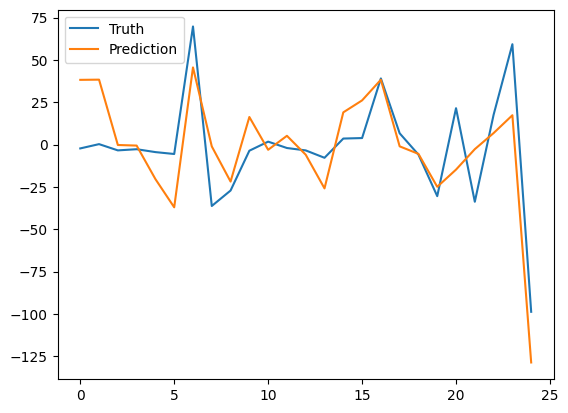

In [82]:
plt.plot(get_cD(y_test_wave, 1, num_level))
plt.plot(preds_wave_cD)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [85]:
preds_wave_whole = (np.array(preds_wave_cA), np.array(preds_wave_cD))

In [86]:
preds = (pywt.waverec(preds_wave_whole, wavelet))

In [87]:
preds

array([ 195.88916 ,  141.86221 , -373.114   , -427.3105  ,  212.16003 ,
        212.52524 ,  236.1418  ,  237.00291 ,  240.15636 ,  268.9987  ,
        245.0994  ,  297.50473 ,  247.82602 ,  183.39612 ,  112.148415,
        113.68131 ,  145.13022 ,  176.0485  ,  195.52484 ,  172.51389 ,
        201.08092 ,  205.45311 ,  229.99257 ,  222.68636 ,  244.90341 ,
        253.38843 ,  241.48341 ,  278.08905 ,  255.85156 ,  228.95749 ,
        263.01144 ,  226.13364 ,  245.66827 ,  191.52802 ,  145.38383 ,
        146.87999 ,   50.72306 ,   58.506645,   77.17481 ,  112.45153 ,
         57.293736,   78.20929 ,   44.03784 ,   47.875618,  111.750885,
        102.17026 ,   82.26198 ,   57.77196 ,   75.84171 ,  257.81982 ],
      dtype=float32)

In [88]:
for i in range(len(y_test)):
	print(y_test[i],"; ", preds[i])

181.7732 ;  195.88916
184.99782 ;  141.86221
206.1224 ;  -373.114
205.76788 ;  -427.3105
211.9411 ;  212.16003
216.8105 ;  212.52524
212.9359 ;  236.1418
216.83131 ;  237.00291
225.20753 ;  240.15636
231.51094 ;  268.9987
238.07948 ;  245.0994
245.9639 ;  297.50473
239.48976 ;  247.82602
140.88992 ;  183.39612
49.2682 ;  112.148415
100.57517 ;  113.68131
141.76262 ;  145.13022
180.157 ;  176.0485
192.17154 ;  195.52484
197.31155 ;  172.51389
199.40543 ;  201.08092
196.97299 ;  205.45311
207.12653 ;  229.99257
210.013 ;  222.68636
218.36394 ;  244.90341
223.25606 ;  253.38843
225.77652 ;  241.48341
236.82887 ;  278.08905
231.34554 ;  255.85156
226.33461 ;  228.95749
232.58704 ;  263.01144
227.16072 ;  226.13364
227.47458 ;  245.66827
172.26237 ;  191.52802
122.32041 ;  145.38383
112.91762 ;  146.87999
68.56082 ;  50.72306
76.97001 ;  58.506645
78.71203 ;  77.17481
121.80164 ;  112.45153
40.31911 ;  57.293736
9.952218 ;  78.20929
12.363579 ;  44.03784
60.140335 ;  47.875618
121.50542 ;  

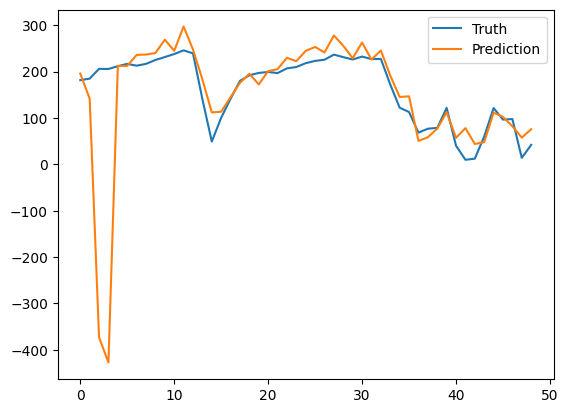

In [90]:
plt.plot(y_test)
plt.plot(preds[:49])
plt.legend(['Truth', 'Prediction'])
plt.show()

## cA evaluation

In [91]:
model_cA.evaluate(get_cA(X_test_wave, num_level), get_cA(y_test_wave, num_level))

1/1 [==============================] - 0s 35ms/step - loss: 30469.2480 - mse: 30469.2480 - mae: 60.8995 - rmse: 174.5544 - rmspe: 0.7047 - mape: 31.6663


[30469.248046875,
 30469.248046875,
 60.89952087402344,
 174.55442810058594,
 0.7047128677368164,
 31.666332244873047]

In [93]:
y_test_wave_cA_cumsum = np.cumsum(get_cA(y_test_wave, num_level))
y_test_wave_cA_cumsum

array([ 259.34625,  550.5967 ,  853.76984, 1157.6611 , 1480.6099 ,
       1822.8801 , 2091.849  , 2197.8044 , 2425.436  , 2700.8423 ,
       2981.124  , 3276.0862 , 3588.3586 , 3915.47   , 4239.0986 ,
       4564.1895 , 4846.846  , 5013.1846 , 5116.0903 , 5257.875  ,
       5293.4224 , 5344.6904 , 5498.95   , 5578.064  , 5736.377  ],
      dtype=float32)

In [96]:
preds_wave_cA_cumsum = np.cumsum(preds_wave_cA)
preds_wave_cA_cumsum

array([ 238.8263 , -327.1593 ,  -26.86145,  307.7024 ,  667.7294 ,
       1051.4084 , 1356.3286 , 1516.0144 , 1743.1221 , 2003.3647 ,
       2290.8276 , 2610.92   , 2963.2654 , 3330.6587 , 3673.4705 ,
       4019.3481 , 4328.4927 , 4535.1543 , 4612.3916 , 4746.4775 ,
       4842.2925 , 4907.285  , 5058.5503 , 5157.5693 , 5393.504  ],
      dtype=float32)

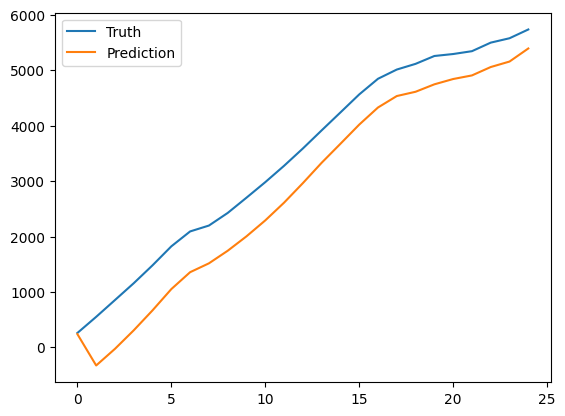

In [97]:
plt.plot(y_test_wave_cA_cumsum)
plt.plot(preds_wave_cA_cumsum)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [100]:
rmspe_score_wave_cA_cumsum = rmspe(y_test_wave_cA_cumsum, preds_wave_cA_cumsum)
rmspe_score_wave_cA_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=0.4580725>

In [101]:
mape_score_wave_cA_cumsum = tf.keras.metrics.mean_absolute_percentage_error(y_test_wave_cA_cumsum, preds_wave_cA_cumsum)
mape_score_wave_cA_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=29.615519>

## cD evaluation

In [137]:
model_cD.evaluate(get_cD(X_test_wave, 1, num_level), get_cD(y_test_wave, 1, num_level))

1/1 [==============================] - 0s 71ms/step - loss: 515.0801 - mse: 515.0801 - mae: 18.0240 - rmse: 22.6954 - rmspe: 30.6869 - mape: 850.9846


[515.0801391601562,
 515.0801391601562,
 18.024005889892578,
 22.695377349853516,
 30.686885833740234,
 850.9845581054688]

In [138]:
y_test_wave_cD_cumsum = np.cumsum(get_cD(y_test_wave, 1, num_level))
y_test_wave_cD_cumsum

array([ -2.2801514,  -2.0294647,  -5.472641 ,  -8.227112 , -12.684296 ,
       -18.259415 ,  51.461197 ,  15.18169  , -11.967236 , -15.601772 ,
       -13.881771 , -15.922817 , -19.382076 , -27.197277 , -23.654018 ,
       -19.817028 ,  19.223896 ,  25.872677 ,  19.926483 , -10.54248  ,
        10.930155 , -22.853113 ,  -5.278116 ,  53.955353 , -44.797836 ],
      dtype=float32)

In [139]:
preds_wave_cD_cumsum = np.cumsum(preds_wave_cD)
preds_wave_cD_cumsum

array([ 38.202816,  76.52551 ,  76.26728 ,  75.65837 ,  55.26376 ,
        18.2076  ,  63.766415,  62.682495,  40.819977,  57.09117 ,
        53.999557,  59.16584 ,  53.166023,  27.28193 ,  46.298904,
        72.37544 , 110.65838 , 109.600426, 104.0966  ,  79.1522  ,
        64.36267 ,  61.648952,  68.42348 ,  85.74053 , -42.937416],
      dtype=float32)

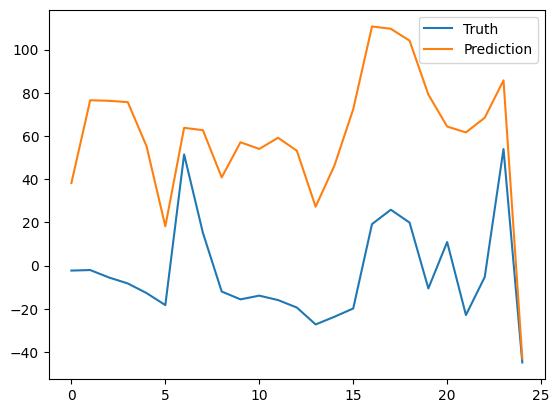

In [140]:
plt.plot(y_test_wave_cD_cumsum)
plt.plot(preds_wave_cD_cumsum)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [141]:
rmspe_score_wave_cD_cumsum = rmspe(y_test_wave_cD_cumsum, preds_wave_cD_cumsum)
rmspe_score_wave_cD_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=10.344092>

In [142]:
mape_score_wave_cD_cumsum = tf.keras.metrics.mean_absolute_percentage_error(y_test_wave_cD_cumsum, preds_wave_cD_cumsum)
mape_score_wave_cD_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=673.0102>

## Final results evaluation

In [102]:
y_test_cumsum = np.cumsum(y_test)
y_test_cumsum

array([ 181.7732 ,  366.771  ,  572.89343,  778.6613 ,  990.6024 ,
       1207.413  , 1420.3489 , 1637.1802 , 1862.3877 , 2093.8987 ,
       2331.9783 , 2577.9421 , 2817.432  , 2958.3218 , 3007.59   ,
       3108.1653 , 3249.928  , 3430.085  , 3622.2566 , 3819.568  ,
       4018.9736 , 4215.947  , 4423.073  , 4633.0864 , 4851.45   ,
       5074.706  , 5300.4824 , 5537.3115 , 5768.657  , 5994.9917 ,
       6227.5786 , 6454.7393 , 6682.214  , 6854.476  , 6976.7964 ,
       7089.714  , 7158.275  , 7235.245  , 7313.957  , 7435.759  ,
       7476.078  , 7486.0303 , 7498.394  , 7558.534  , 7680.0396 ,
       7776.69   , 7874.516  , 7888.5737 , 7930.689  ], dtype=float32)

In [103]:
preds_cumsum = np.cumsum(preds)
preds_cumsum

array([ 195.88916 ,  337.75137 ,  -35.36264 , -462.67313 , -250.51309 ,
        -37.987854,  198.15395 ,  435.15686 ,  675.31323 ,  944.3119  ,
       1189.4113  , 1486.916   , 1734.7421  , 1918.1382  , 2030.2866  ,
       2143.968   , 2289.0981  , 2465.1467  , 2660.6716  , 2833.1855  ,
       3034.2664  , 3239.7195  , 3469.7122  , 3692.3984  , 3937.3018  ,
       4190.6904  , 4432.174   , 4710.2627  , 4966.1143  , 5195.072   ,
       5458.083   , 5684.217   , 5929.8853  , 6121.413   , 6266.797   ,
       6413.677   , 6464.4     , 6522.9067  , 6600.0815  , 6712.533   ,
       6769.827   , 6848.0366  , 6892.074   , 6939.9497  , 7051.7007  ,
       7153.871   , 7236.1333  , 7293.9053  , 7369.747   , 7627.567   ],
      dtype=float32)

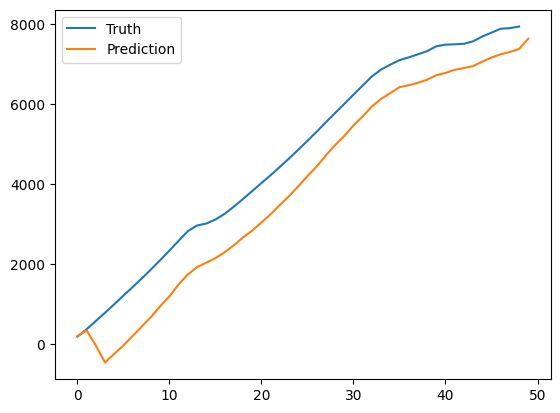

In [104]:
plt.plot(y_test_cumsum)
plt.plot(preds_cumsum)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [105]:
rmspe_score = rmspe(y_test_cumsum, preds_cumsum[:49])
rmspe_score

<tf.Tensor: shape=(), dtype=float32, numpy=0.45225662>

In [106]:
mape_score = tf.keras.metrics.mean_absolute_percentage_error(y_test_cumsum, preds_cumsum[:49])
mape_score

<tf.Tensor: shape=(), dtype=float32, numpy=30.383432>

In [ ]:
model.save('cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf')

In [ ]:
!zip -r /content/"cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf".zip /content/"cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf"

In [ ]:
loaded_1 = tf.keras.models.load_model("cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf")

In [ ]:
loaded_1.evaluate(X_test, y_test)

# data -> frequency

In [ ]:
def get_wave(data, mode, num_level):
  wave = []
  for i in range(len(data)):
    wave.append(pywt.wavedec([data[i]], mode, level = num_level))
  return np.array(wave).T[0]

In [ ]:
mode = 'haar'

## 1 levels

In [ ]:
num_level = 1

In [ ]:
lc_wave1 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave1

In [ ]:
# Plot cA
plt.plot(lc_wave1[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(lc_wave1[1])
plt.show()

## 2 levels

In [ ]:
num_level = 2

In [ ]:
lc_wave2 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave2

In [ ]:
# Plot cA
plt.plot(lc_wave2[0])
plt.show()

In [ ]:
# Plot cD1
plt.plot(lc_wave2[1])
plt.show()

In [ ]:
# Plot cD2
plt.plot(lc_wave2[2])
plt.show()

## 3 levels

In [ ]:
num_level = 3

In [ ]:
lc_wave3 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave3

In [ ]:
# Plot cA
plt.plot(lc_wave3[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(lc_wave3[1])
plt.show()

In [ ]:
plt.plot(lc_wave1[0])
plt.plot(lc_wave2[0])
plt.plot(lc_wave3[0])
plt.legend(['A1', 'A2', 'A3'])
plt.show()

# **Temperature**

# data -> frequency

## level 1

In [ ]:
num_level = 1

In [ ]:
temp_wave1 = get_wave(temp_new, mode, num_level)

In [ ]:
temp_wave1

In [ ]:
# Plot cA
plt.plot(temp_wave1[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(temp_wave1[1])
plt.show()

## level 2

In [ ]:
num_level = 2

In [ ]:
temp_wave2 = get_wave(temp_new, mode, num_level)

In [ ]:
temp_wave2

In [ ]:
# Plot cA
plt.plot(temp_wave2[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(temp_wave2[1])
plt.show()

In [ ]:
# Plot cA
plt.plot(temp_wave1[0])
plt.plot(temp_wave2[0])
plt.show()